<a href="https://colab.research.google.com/github/MoazAshraf/predicting_imdb_ratings/blob/master/predicting_imdb_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting IMDb Movie Ratings
This solution can be used to develop a movie recommendation system in which movies with higher ratings would have a higher chance of being recommended.

This is a supervised regression problem. [This](https://www.kaggle.com/orgesleka/imdbmovies) public dataset will be used for training and evaluation.

To measure the performance of the system, the root mean squared error will be used as the performance metric. The baseline will be the standard deviation of the movie ratings in the training set as it measures the performance of random guessing.


##Get the Data

In [2]:
import os, stat
from google.colab import files

# upload kaggle.json file
files.upload()  # Upload your kaggle.json file when prompted here

# create the directory
KAGGLE_DIR = '/root/.kaggle'
KAGGLE_FILE_NAME = 'kaggle.json'
if not os.path.isdir(KAGGLE_DIR):
    os.makedirs(KAGGLE_DIR)
kaggle_file_path = os.path.join(KAGGLE_DIR, KAGGLE_FILE_NAME)

# move kaggle file to kaggle directory and set its permissions to be read and written by user only
os.rename(KAGGLE_FILE_NAME, kaggle_file_path)
os.chmod(kaggle_file_path, stat.S_IREAD | stat.S_IWRITE)

Saving kaggle.json to kaggle.json


In [3]:
# download the dataset
!kaggle datasets download -d orgesleka/imdbmovies

  0% 0.00/783k [00:00<?, ?B/s]
100% 783k/783k [00:00<00:00, 51.0MB/s]


In [4]:
# unzip the data
!unzip imdbmovies.zip

Archive:  imdbmovies.zip
  inflating: imdb.csv                


In [0]:
import pandas as pd

# read the data
imdb_data = pd.read_csv('imdb.csv', escapechar='\\')

In [6]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fn                14761 non-null  object 
 1   tid               14761 non-null  object 
 2   title             14761 non-null  object 
 3   wordsInTitle      14748 non-null  object 
 4   url               14761 non-null  object 
 5   imdbRating        13551 non-null  float64
 6   ratingCount       13551 non-null  float64
 7   duration          13745 non-null  float64
 8   year              14731 non-null  float64
 9   type              14761 non-null  object 
 10  nrOfWins          14761 non-null  int64  
 11  nrOfNominations   14761 non-null  int64  
 12  nrOfPhotos        14761 non-null  int64  
 13  nrOfNewsArticles  14761 non-null  int64  
 14  nrOfUserReviews   14761 non-null  int64  
 15  nrOfGenre         14761 non-null  int64  
 16  Action            14761 non-null  int64 

In [0]:
# remove records with missing imdb rating
imdb_data.dropna(subset=['imdbRating'], inplace=True)

In [8]:
imdb_data.shape[0]

13551

In [9]:
imdb_data.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,13551.000000,1.355100e+04,12793.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.00000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000,13551.000000
mean,6.865707,2.642480e+04,5626.405378,1989.476496,3.365951,4.914545,25.635377,269.551989,112.456719,2.295107,0.165301,0.001328,0.132610,0.073426,0.044868,0.362630,0.148107,0.075640,0.447495,0.076231,0.061324,0.014021,0.006937,0.041252,0.074312,0.032544,0.02723,0.071877,0.003985,0.006937,0.137702,0.070770,0.034167,0.016899,0.012471,0.096303,0.034831,0.023910
std,1.119515,6.506456e+04,2702.125762,22.302556,9.581572,16.831365,67.742465,1092.792558,236.940988,0.794300,0.371466,0.036423,0.339165,0.260845,0.207021,0.480777,0.355219,0.264431,0.497254,0.265376,0.239932,0.117582,0.083001,0.198879,0.262287,0.177446,0.16276,0.258293,0.063003,0.083001,0.344600,0.256449,0.181665,0.128898,0.110981,0.295017,0.183359,0.152773
min,1.000000,5.000000e+00,2.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.025000e+02,4680.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.977000e+03,5760.000000,1998.000000,0.000000,0.000000,9.000000,13.000000,37.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.085850e+04,6720.000000,2006.000000,3.000000,4.000000,29.000000,120.500000,114.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.183395e+06,68400.000000,2014.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.model_selection import train_test_split

imdb_data['imdbRating_cat'] = pd.cut(imdb_data['imdbRating'], bins=10, labels=range(10))
training_set, test_set = train_test_split(imdb_data, test_size=0.2, stratify=imdb_data['imdbRating_cat'])

In [22]:
print(training_set.shape, test_set.shape)

(10840, 45) (2711, 45)


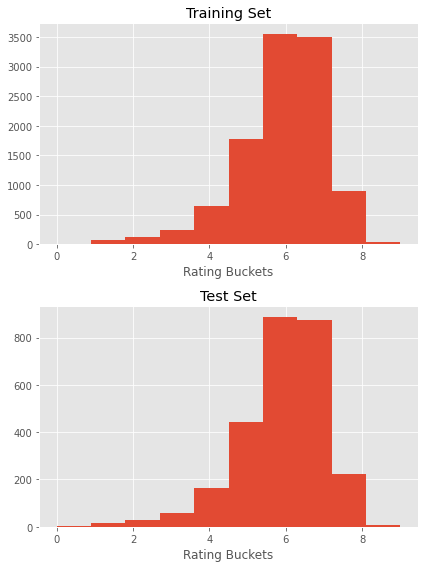

In [32]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.title('Training Set')
training_set['imdbRating_cat'].hist()
plt.xlabel('Rating Buckets')

plt.subplot(2, 1, 2)
plt.title('Test Set')
test_set['imdbRating_cat'].hist()
plt.xlabel('Rating Buckets')

fig.tight_layout()
plt.show()